In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# STEP 1. Скачайте датасет.

Download the Adult training data set: http://archive.ics.uci.edu/ml/datasets/Adult
(file adult.data)

In [4]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

--2019-04-08 10:00:32--  http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3,8M) [application/x-httpd-php]
Saving to: ‘adult.data.2’

adult.data.2        100%[===================>]   3,79M  85,6KB/s    in 65s     

2019-04-08 10:01:38 (59,7 KB/s) - ‘adult.data.2’ saved [3974305/3974305]



In [5]:
!head adult.data

39, State-gov, 77516, Bachelors, 13, Never-married, Adm-clerical, Not-in-family, White, Male, 2174, 0, 40, United-States, <=50K
50, Self-emp-not-inc, 83311, Bachelors, 13, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 13, United-States, <=50K
38, Private, 215646, HS-grad, 9, Divorced, Handlers-cleaners, Not-in-family, White, Male, 0, 0, 40, United-States, <=50K
53, Private, 234721, 11th, 7, Married-civ-spouse, Handlers-cleaners, Husband, Black, Male, 0, 0, 40, United-States, <=50K
28, Private, 338409, Bachelors, 13, Married-civ-spouse, Prof-specialty, Wife, Black, Female, 0, 0, 40, Cuba, <=50K
37, Private, 284582, Masters, 14, Married-civ-spouse, Exec-managerial, Wife, White, Female, 0, 0, 40, United-States, <=50K
49, Private, 160187, 9th, 5, Married-spouse-absent, Other-service, Not-in-family, Black, Female, 0, 0, 16, Jamaica, <=50K
52, Self-emp-not-inc, 209642, HS-grad, 9, Married-civ-spouse, Exec-managerial, Husband, White, Male, 0, 0, 45, United-States, >50K
31, 

# Step 2. Поймите формат и зачитайте adult.data в переменную df. Используйте cols чтобы дать нормальные названия колонкам.

Обратите внимание на формат!

In [6]:
cols = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'result']

In [7]:
df = pd.read_csv('adult.data', names=cols, sep=', ')

/home/oem/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,result
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Male      21790
Female    10771
Name: sex, dtype: int64

# Сколько мужчин и женщин?


In [10]:
df['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

# Средний возраст мужчин и женщин?

In [11]:
df.groupby('sex')['age'].mean()

sex
Female    36.858230
Male      39.433547
Name: age, dtype: float64

# Какая доля граждан США (United-States) в данном датасете?

In [13]:
(df['native-country'] == 'United-States').sum() / len(df)

0.895857006848684

# Нарисуйте распределние образования людей (используйте bar plot)

Подпишите график и оси.

Text(0.5, 1.0, 'Education Distribution among educated people')

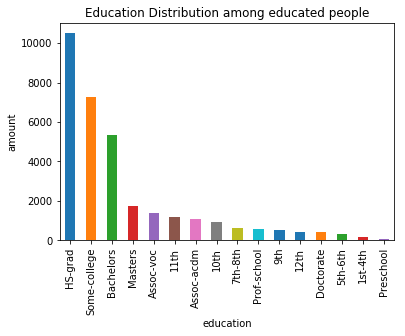

In [16]:
education = df.groupby('education').size().sort_values(ascending=False)
education.plot.bar()
plt.ylabel('amount')
plt.title('Education Distribution among educated people')

# Какое среднее значние и квадратичное отклонение (std) fnlwgt (”final weight”) разведенных (divorced people) людей. Нарисуйте гистрограмму (Какое распределение оно вам напоминает?)

In [25]:
weight = df[df['marital-status'] == 'Divorced']['fnlwgt']

/home/oem/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


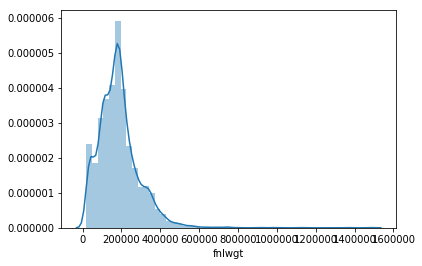

In [33]:
sns.distplot(weight)

> Ответ: оно мне напоминает ... распределение Chi2

# Правда ли, что большинство людей, из тех кто получает больше 50k, с высшим образованием  (BSc, MSc, PhD - ????)

In [37]:
high_ed = df[df['result'] == '>50K']['education'].isin(['Bachelors', 'Masters', 'Doctorate']).sum()
total = len(df[df['result'] == '>50K']['education'])

In [38]:
high_ed / total

0.4445861497258003

> Ответ: Нет.

# Сколько в среднем работают люди в неделю в зависимости от education?

In [39]:
df.groupby('education')['hours-per-week'].mean().sort_values(ascending=False)

education
Prof-school     47.425347
Doctorate       46.973366
Masters         43.836332
Bachelors       42.614006
Assoc-voc       41.610709
HS-grad         40.575374
Assoc-acdm      40.504217
7th-8th         39.366873
5th-6th         38.897898
Some-college    38.852284
1st-4th         38.255952
9th             38.044747
10th            37.052519
Preschool       36.647059
12th            35.780600
11th            33.925957
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - мужчины или женщины?

In [41]:
df.groupby('sex')['hours-per-week'].mean()

sex
Female    36.410361
Male      42.428086
Name: hours-per-week, dtype: float64

# Кто больше работает в неделю - те кто в отношениях или те кто нет?

In [42]:
df.groupby('relationship')['hours-per-week'].mean()

relationship
Husband           44.120139
Not-in-family     40.595665
Other-relative    37.006116
Own-child         33.269337
Unmarried         39.103018
Wife              36.861607
Name: hours-per-week, dtype: float64

In [44]:
relationship = df[df['relationship'].isin(['Husband', 'Wife'])]['hours-per-week'].mean()
no_relationship = df[df['relationship'].isin(['Not-in-family', 'Unmarried'])]['hours-per-week'].mean()

In [45]:
print('in : ', relationship, ' not: ', no_relationship)

in :  43.34909558972969  not:  40.157944004765554


# Из каких стран люди работают farmers/fishers?

In [47]:
df[df['occupation'] == 'Farming-fishing']['native-country'].unique()

array(['United-States', 'Cambodia', 'Poland', 'Guatemala', 'Mexico',
       'England', '?', 'Philippines', 'Italy', 'Puerto-Rico', 'Vietnam',
       'Germany', 'Japan', 'Canada', 'Yugoslavia', 'Cuba', 'Portugal',
       'El-Salvador', 'Hong', 'Ireland', 'France'], dtype=object)

# Сколько максимум работают люди в неделю? Как много таких людей кто работает наибольшее количество часов? Какой у них доход (распечатать)?

In [48]:
df['hours-per-week'].max()

99

In [51]:
len(df[df['hours-per-week'] == df['hours-per-week'].max()])

85

In [53]:
df[df['hours-per-week'] == df['hours-per-week'].max()]['result']

935       >50K
1172      >50K
1887      >50K
3578      >50K
4086     <=50K
4308     <=50K
4441      >50K
5376     <=50K
5432     <=50K
6618     <=50K
6898     <=50K
8072     <=50K
8393      >50K
8654     <=50K
8796      >50K
9811     <=50K
9831     <=50K
10143    <=50K
10266    <=50K
10468    <=50K
10986     >50K
11833    <=50K
12209    <=50K
12625    <=50K
12788    <=50K
13558     >50K
13580    <=50K
13617    <=50K
13858     >50K
14593    <=50K
         ...  
23226    <=50K
23398    <=50K
23649     >50K
23830    <=50K
24483     >50K
25354    <=50K
25713     >50K
25806    <=50K
25831     >50K
25986    <=50K
26250    <=50K
26596     >50K
26638    <=50K
26858    <=50K
27222    <=50K
27764    <=50K
27809    <=50K
28112    <=50K
29187     >50K
29751    <=50K
29989     >50K
30036     >50K
30610     >50K
30754    <=50K
30766     >50K
30992    <=50K
31681     >50K
31699    <=50K
32469    <=50K
32531    <=50K
Name: result, Length: 85, dtype: object